# WINE CLASSIFICATION

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [178]:
df=pd.read_csv('C:/Users/Sarathram/Downloads/Data_Set/wine.xls', names = ["Cultivator", "Alcohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])
df.head()

,Cultivator,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [179]:
df['Cultivator'].value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

In [180]:
X=df.drop(['Cultivator'],axis=1)


##### Most of the real world data are unlabelled and unclassified. There comes the implementation of Unsupervised Machine Learning. So, lets remove the target column 'Cultivator' and perform clustering

In [181]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Alcalinity_of_Ash     178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_phenols         178 non-null    float64
 6   Falvanoids            178 non-null    float64
 7   Nonflavanoid_phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


#### Observation : There are no null values

In [182]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Falvanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


## Univariate Analysis

Alcohol


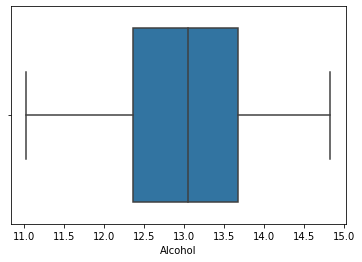

Malic_Acid


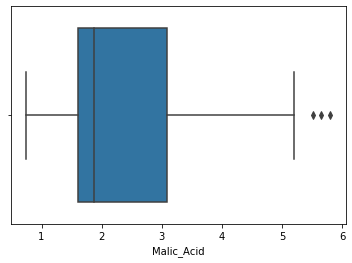

Ash


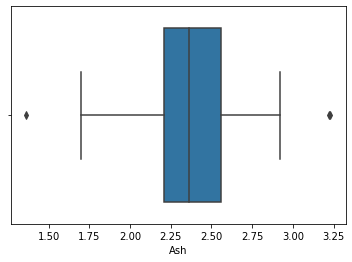

Alcalinity_of_Ash


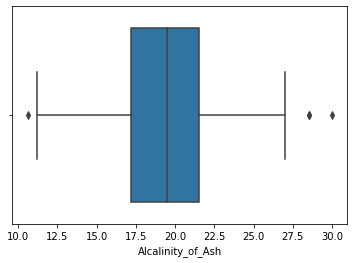

Magnesium


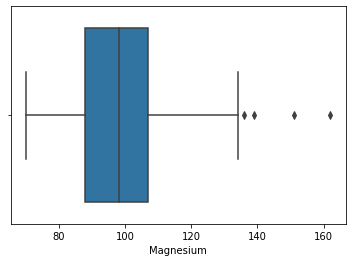

Total_phenols


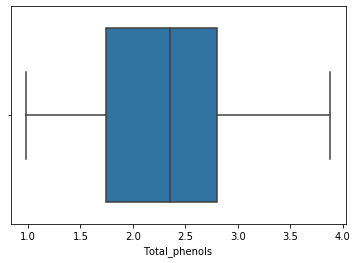

Falvanoids


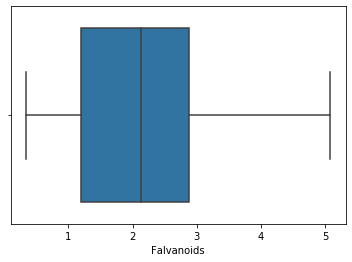

Nonflavanoid_phenols


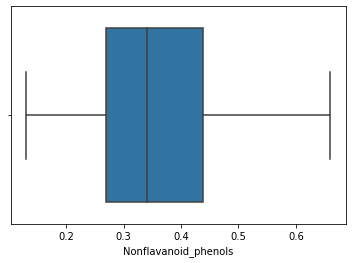

Proanthocyanins


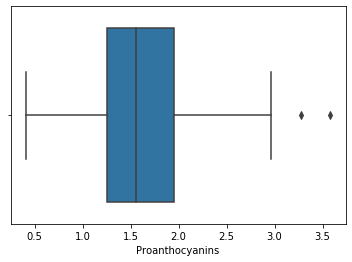

Color_intensity


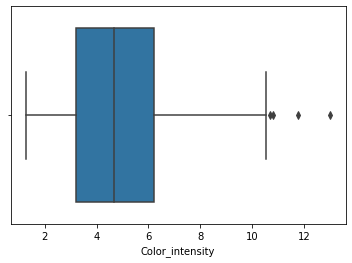

Hue


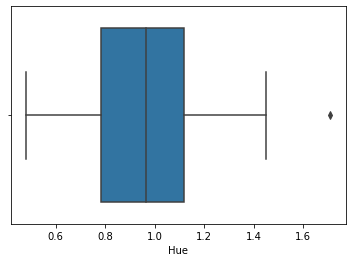

OD280


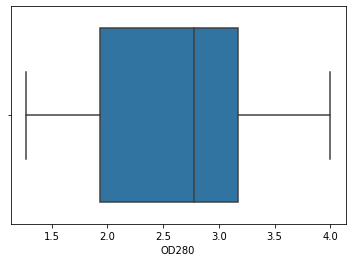

Proline


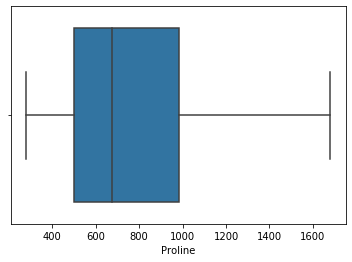

In [183]:
for i in X.columns:
    print(i)
    sns.boxplot(X[i])
    plt.show()

# Checking for Outliers

In [184]:

def outlier_treatment(col):
    Q1=X[col].quantile(0.25)
    Q3=X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    df=pd.DataFrame({'Lower Range':lower_range,'Upper Range':upper_range,
                     'Outlier(No.)(LR)':X[X[col]<lower_range][col].count(),
                     ' Outlier(%)(LR)':round(X[X[col] < lower_range][col].count()*100/len(X),2),
                     'Outlier(No.)(UR)':X[X[col]>upper_range][col].count(),
                     'Outlier(%)(UR)':round(X[X[col]>upper_range][col].count()*100/len(X),2)},
                    index=X.columns)
    display(df)
outlier_treatment(X.columns)

,Lower Range,Upper Range,Outlier(No.)(LR),Outlier(%)(LR),Outlier(No.)(UR),Outlier(%)(UR)
Alcohol,10.39000,15.65000,0,0.00,0,0.00
Malic_Acid,-0.61750,5.30250,0,0.00,3,1.69
Ash,1.68875,3.07875,1,0.56,2,1.12
Alcalinity_of_Ash,10.75000,27.95000,1,0.56,3,1.69
Magnesium,59.50000,135.50000,0,0.00,4,2.25
Total_phenols,0.15625,4.38625,0,0.00,0,0.00
Falvanoids,-1.30000,5.38000,0,0.00,0,0.00
Nonflavanoid_phenols,0.01875,0.68875,0,0.00,0,0.00
Proanthocyanins,0.20000,3.00000,0,0.00,2,1.12
Color_intensity,-1.25000,10.67000,0,0.00,4,2.25


# Imputing the outliers with median

In [185]:
for col in X.columns:
    Q1=X[col].quantile(0.25)
    Q3=X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    median= X[col].median()
    X[col] = np.where(X[col] > upper_range, median,X[col])
    X[col] = np.where(X[col] < lower_range, median,X[col])

In [186]:
def outlier_treatment(col):
    Q1=X[col].quantile(0.25)
    Q3=X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    df=pd.DataFrame({'Lower Range':lower_range,'Upper Range':upper_range,
                     'Outlier(No.)(LR)':X[X[col]<lower_range][col].count(),
                     ' Outlier(%)(LR)':round(X[X[col] < lower_range][col].count()*100/len(X),2),
                     'Outlier(No.)(UR)':X[X[col]>upper_range][col].count(),
                     'Outlier(%)(UR)':round(X[X[col]>upper_range][col].count()*100/len(X),2)},
                    index=X.columns)
    display(df)
outlier_treatment(X.columns)

,Lower Range,Upper Range,Outlier(No.)(LR),Outlier(%)(LR),Outlier(No.)(UR),Outlier(%)(UR)
Alcohol,10.39000,15.65000,0,0.00,0,0.00
Malic_Acid,-0.46750,5.05250,0,0.00,1,0.56
Ash,1.72125,3.03125,3,1.69,0,0.00
Alcalinity_of_Ash,10.75000,27.95000,0,0.00,0,0.00
Magnesium,61.00000,133.00000,0,0.00,1,0.56
Total_phenols,0.15625,4.38625,0,0.00,0,0.00
Falvanoids,-1.30000,5.38000,0,0.00,0,0.00
Nonflavanoid_phenols,0.01875,0.68875,0,0.00,0,0.00
Proanthocyanins,0.21125,2.98125,0,0.00,0,0.00
Color_intensity,-0.95000,10.17000,0,0.00,3,1.69


#### Observation : The number of outliers are very less.

## Multivariate Analysis:

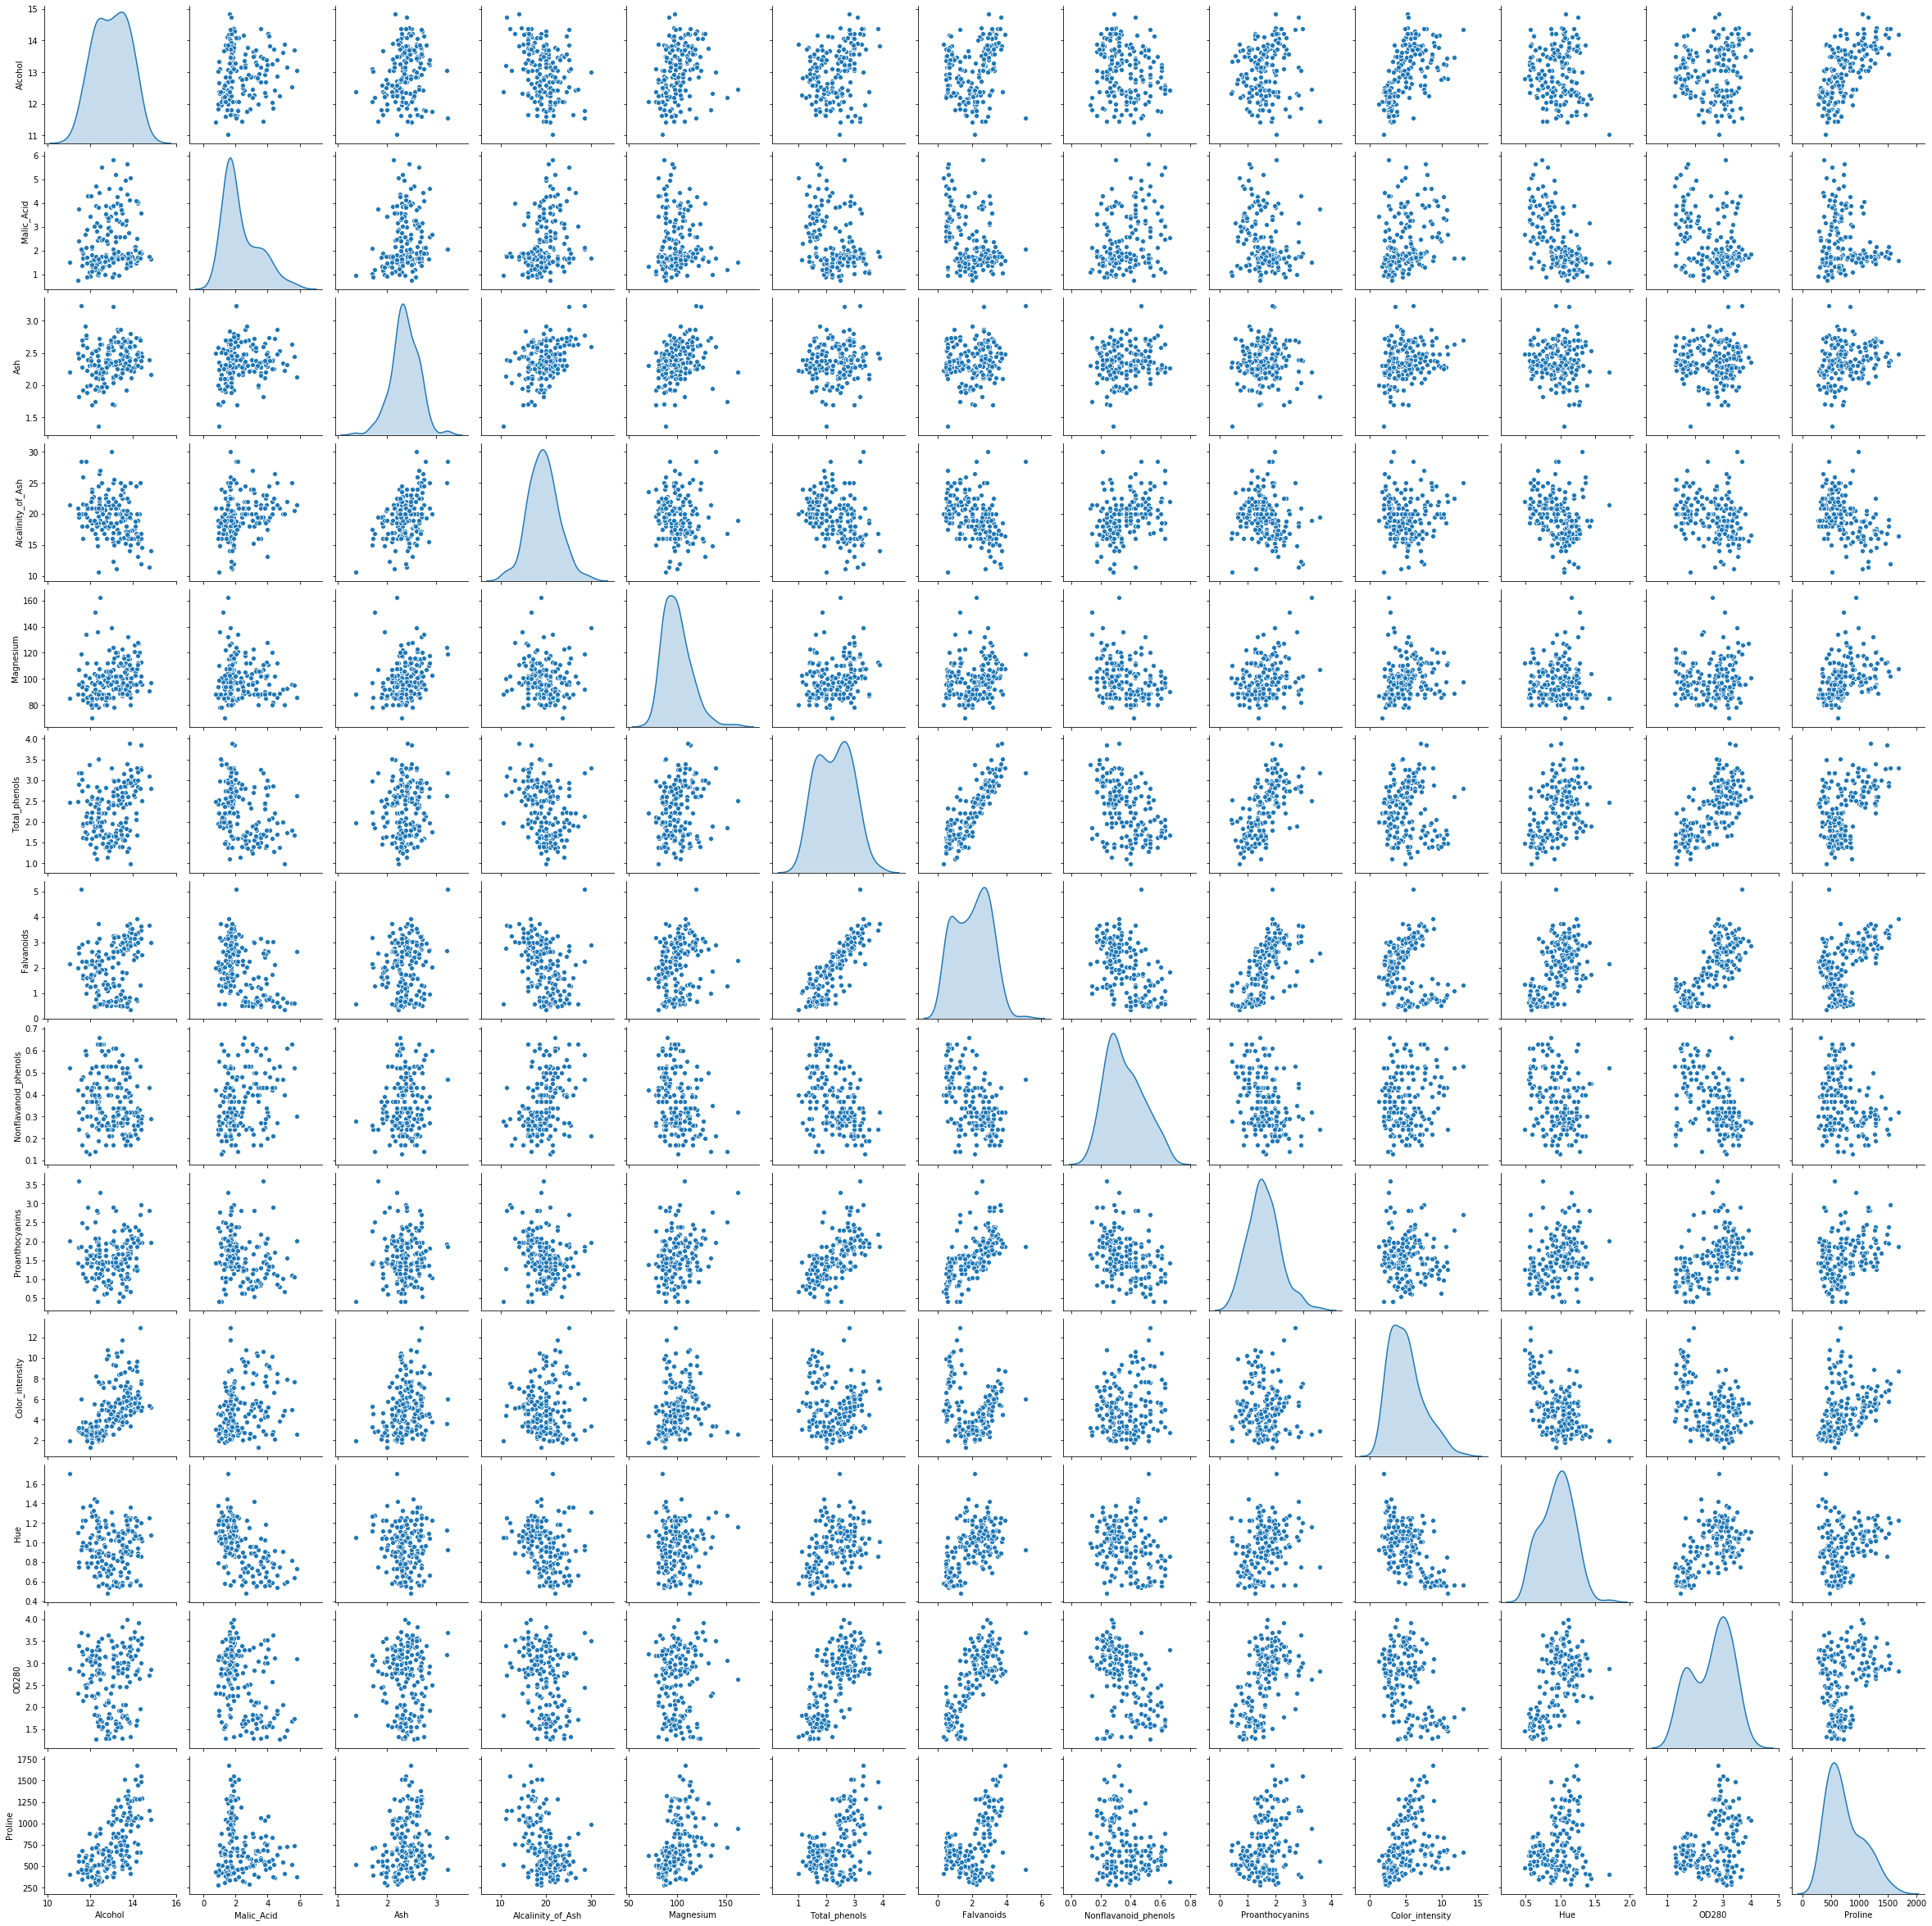

In [9]:
sns.pairplot(X,diag_kind='kde')

In [10]:
corr_mat=X.corr()
corr_mat

,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_Ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Falvanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


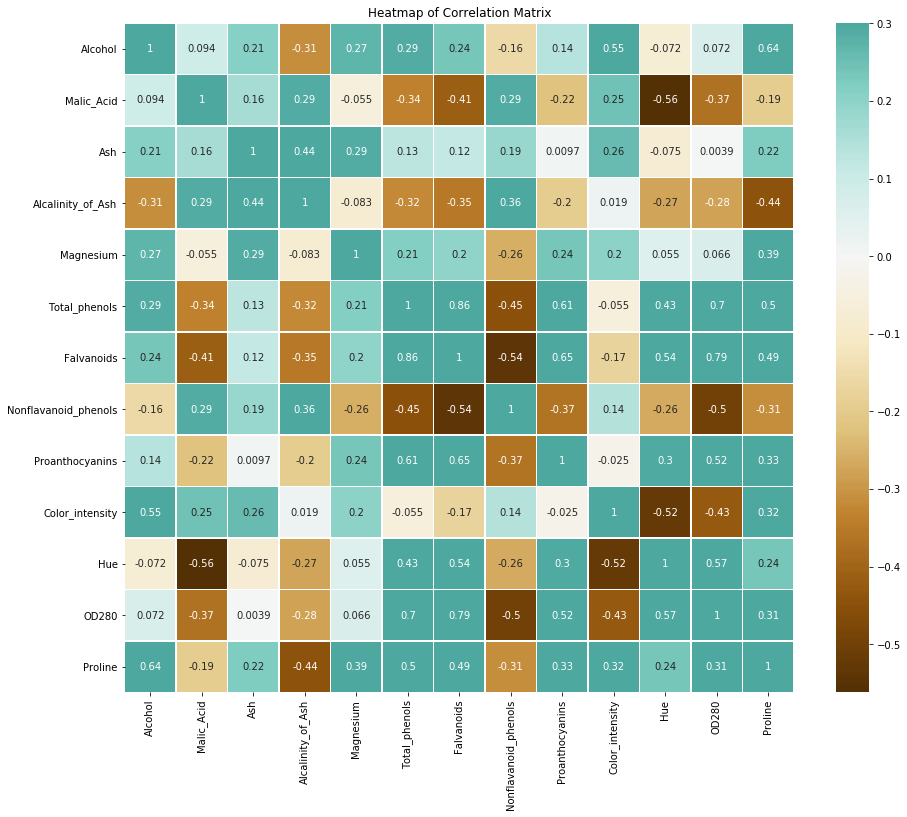

In [11]:
plt.figure(figsize = (15,15))
#cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7)
sns.heatmap(corr_mat, xticklabels=corr_mat.columns.values, yticklabels=corr_mat.columns.values,cmap="BrBG",
            vmax=.3, center=0, square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')
plt.show()

#### Observation : Multicollinearity exists among the independent variables. We can reduce multicollinearity using the Principal Component Analysis.

## Standardizing

In [187]:
from scipy.stats import zscore
X_scaled = X.apply(zscore)
X_scaled.shape

(178, 13)

In [188]:
km_df=X_scaled.copy(deep=True)



# KMeans Clustering

In [189]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

K = range(1,10)
KM = [KMeans(n_clusters=k).fit(km_df) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(km_df, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/km_df.shape[0] for d in dist]

In [190]:
from sklearn.cluster import KMeans

cluster_range=range(1,15)
cluster_inertia=[]
for num_clusters in cluster_range:
    model=KMeans(num_clusters)
    model.fit(km_df)
    cluster_inertia.append(model.inertia_)

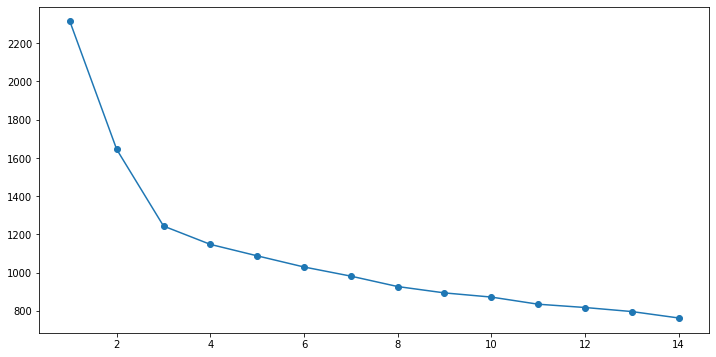

In [191]:
plt.figure(figsize=(12,6))
plt.plot(cluster_range,cluster_inertia,marker='o')

In [192]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=101)
kmeans.fit(km_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [193]:
centroids = kmeans.cluster_centers_
centroids_df=pd.DataFrame(centroids,columns=list(km_df))
centroids_df

,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,0.859670,-0.259715,0.323812,-0.751342,0.636241,0.894368,0.989887,-0.565776,0.615924,0.285874,0.501225,0.791598,1.133706
1,-0.921972,-0.428819,-0.472290,0.218967,-0.589700,-0.069857,0.024159,-0.038135,0.042167,-0.927895,0.451222,0.267054,-0.733252
2,0.164907,0.865583,0.223895,0.615295,0.002147,-0.979330,-1.215248,0.726064,-0.791263,0.858878,-1.183439,-1.292412,-0.407088


In [194]:
kmeans.inertia_

1243.8069436727947

In [195]:
km_df['cluster_number'] = kmeans.labels_
km_df['cluster_number'] = km_df['cluster_number'].astype('category')
km_df['cluster_number'].value_counts()

1    66
0    61
2    51
Name: cluster_number, dtype: int64

Text(0.5, 0.92, '3D plot of KMeans Clustering')

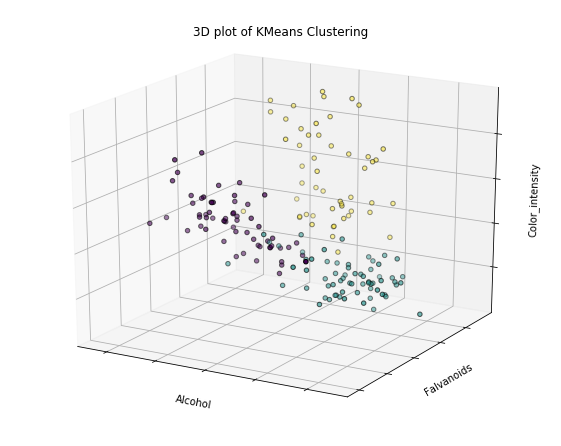

In [196]:
#3D Scatter Plot of the Clusters formed
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=120)
kmeans.fit(km_df)
labels = kmeans.labels_
ax.scatter(km_df.iloc[:, 0], km_df.iloc[:,6 ], km_df.iloc[:, 9],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Alcohol')
ax.set_ylabel('Falvanoids')
ax.set_zlabel('Color_intensity')
ax.set_title('3D plot of KMeans Clustering')

## Agglomerative Clustering

In [197]:
agg_df=X_scaled.copy(deep=True)



In [198]:
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.metrics import accuracy_score

In [199]:
def fun(model,df1,c):      
    L=pd.DataFrame(model.labels_)
    b=[]   
    d=[]
    df_ag_label=agg_df.copy(deep=True)
    df_ag_label['labels']=model.labels_

    for i in range(c):
        b.append(df_ag_label[df_ag_label['labels']==i])
    a=df_ag_label.groupby('labels').mean()
    

    for i in range(c):
        d.append(a.iloc[i])
        
    k=[]    
    for j in range(len(b)):
        i0=0
        for i in np.arange(b[j].shape[0]):
            i0=i0+np.sum((b[j].iloc[i,:-1]-d[j])**2)
        k.append(i0)
    return(sum(k)),L,a,df_ag_label



In [200]:
d1={}
for aff in['euclidean','manhattan','cosine']:
    for lk in['single','complete','average','ward']:
        if(lk=='ward' and aff!='euclidean'):
            continue
        model=AgglomerativeClustering(n_clusters=3,affinity=aff,linkage=lk)
        model.fit(agg_df)
        inert,L,a,dflabel=fun(model,agg_df,3)
        st=str(lk)+' '+str(aff)
        d1[st]=inert
        
print(*d1.items(), sep='\n')
print('\n inertia of the best model:',min(d1,key=d1.get),min(d1.values()))


('single euclidean', 2271.230830703637)
('complete euclidean', 1483.0462816758)
('average euclidean', 1665.8197048216366)
('ward euclidean', 1278.458536596761)
('single manhattan', 2271.230830703637)
('complete manhattan', 1329.8088167484736)
('average manhattan', 1253.205389257844)
('single cosine', 2275.2437104700507)
('complete cosine', 1315.0385802139608)
('average cosine', 1257.209199629312)

 inertia of the best model: average manhattan 1253.205389257844


In [201]:
coph={}
for lk in ['single','complete','average','ward','centroid','weighted']: 
    Z = linkage(agg_df, method=lk)
    c, coph_dists = cophenet(Z , pdist(agg_df))
    coph[lk]=c
print(*coph.items(), sep='\n')
print('\n best cophenet :',max(coph,key=coph.get),max(coph.values()))


('single', 0.461691331361537)
('complete', 0.6779051382783009)
('average', 0.7395244931112779)
('ward', 0.6861082998373109)
('centroid', 0.7320684768170134)
('weighted', 0.6855246648969702)

 best cophenet : average 0.7395244931112779


In [202]:
acc={}
for aff in['euclidean','manhattan','cosine']:
    for lk in['single','complete','average','ward']:
        if(lk=='ward' and aff!='euclidean'):
            continue
        model=AgglomerativeClustering(n_clusters=3,affinity=aff,linkage=lk)
        model.fit(agg_df)
        st=str(lk)+' '+str(aff)
        
        acc[st]=accuracy_score(df['Cultivator'],model.labels_)
print(*acc.items(), sep='\n')
print('\n best accuracy:',max(acc,key=acc.get),max(acc.values()))

('single euclidean', 0.0056179775280898875)
('complete euclidean', 0.14606741573033707)
('average euclidean', 0.0056179775280898875)
('ward euclidean', 0.016853932584269662)
('single manhattan', 0.0056179775280898875)
('complete manhattan', 0.5786516853932584)
('average manhattan', 0.0056179775280898875)
('single cosine', 0.0056179775280898875)
('complete cosine', 0.0449438202247191)
('average cosine', 0.6685393258426966)

 best accuracy: average cosine 0.6685393258426966


In [203]:
model_agg = AgglomerativeClustering(n_clusters=3, affinity='manhattan',  linkage='average')

In [204]:
model_agg.fit(agg_df)

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [205]:
agg_df['cluster_labels'] = model_agg.labels_
agg_df['cluster_labels']=agg_df['cluster_labels'].astype('category')
agg_df['cluster_labels'].value_counts()

0    68
2    59
1    51
Name: cluster_labels, dtype: int64

Text(0.5, 0.92, '3D plot of Hierarchical Clustering')

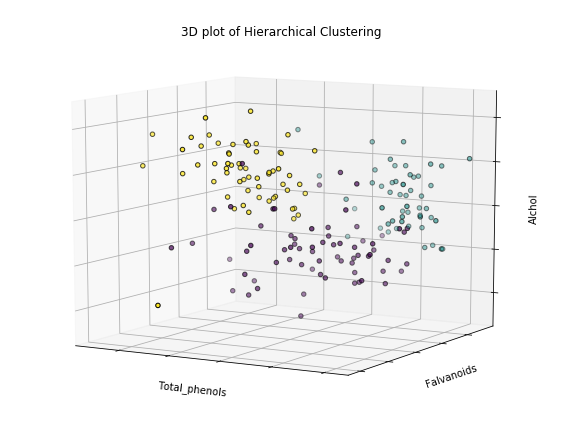

In [206]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=120) # elev and azim can change view 
model_agg.fit(agg_df)
labels = model_agg.labels_
ax.scatter(agg_df.iloc[:, 5], agg_df.iloc[:, 6], agg_df.iloc[:, 0],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Total_phenols')
ax.set_ylabel('Falvanoids')
ax.set_zlabel('Alchol')
ax.set_title('3D plot of Hierarchical Clustering')

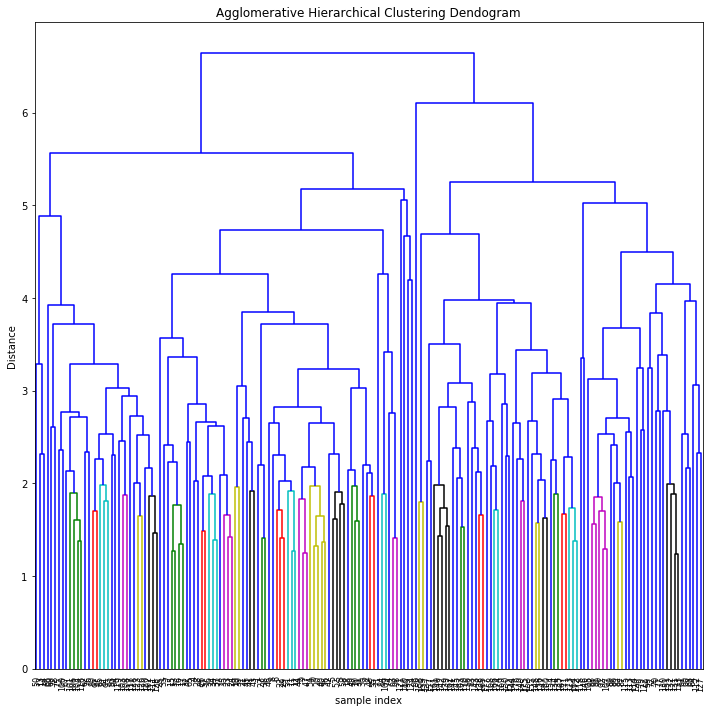

In [207]:
#Plot dendogram
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., color_threshold=2, leaf_font_size=8. )
plt.tight_layout()

#### Observation : KMeans clustering is the best method in this case as the inertia of KMeans clustering is lesser compared to Agglomerative clustering

In [208]:
X_std=km_df.drop(['cluster_number'],axis=1)
y_target=km_df['cluster_number']


## Principal Component Analysis

In [209]:
cov_matrix = np.cov(X_std, rowvar=False)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 1.00564972  0.09505072  0.25234364 -0.30190215  0.3757888   0.29073446
   0.23815287 -0.15681042  0.19899903  0.55544141 -0.02807898  0.07275191
   0.64735687]
 [ 0.09505072  1.00564972  0.16877794  0.28532941  0.04977342 -0.3400886
  -0.4033401   0.26048889 -0.2515925   0.29579004 -0.55311196 -0.36534874
  -0.16887536]
 [ 0.25234364  0.16877794  1.00564972  0.33539777  0.37169798  0.09346149
   0.02089219  0.15806321 -0.00213419  0.2148981  -0.07672625 -0.06796206
   0.24552804]
 [-0.30190215  0.28532941  0.33539777  1.00564972 -0.15224228 -0.41596044
  -0.48662771  0.37050184 -0.29589406 -0.07205907 -0.35055521 -0.37211258
  -0.48582538]
 [ 0.3757888   0.04977342  0.37169798 -0.15224228  1.00564972  0.23982704
   0.22769701 -0.22189698  0.09537     0.33188211 -0.0130691   0.04446796
   0.43113561]
 [ 0.29073446 -0.3400886   0.09346149 -0.41596044  0.23982704  1.00564972
   0.86944804 -0.45247731  0.61981187 -0.05189469  0.44517586  0.70390388
   0.50092909

In [210]:
#Calculate eigenvalues and eigenvectors 
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

# eigenvectors is a 13x13 matrix
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)

# eigenvalues is a 13x1 vector
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-0.15843193  0.4605688  -0.15281202  0.05291463 -0.21657107  0.19262656
   0.38229318 -0.05921985  0.13242105 -0.56755988  0.05337573  0.33529546
  -0.21915653]
 [ 0.22949146  0.24730811  0.04325352 -0.56164356  0.08838287  0.6587774
  -0.13673384 -0.00323237  0.16573759  0.0866349   0.08849021 -0.25187219
  -0.04590811]
 [ 0.00900944  0.31509024  0.68696786  0.17780202 -0.05992484  0.0697414
   0.13687148  0.02452086 -0.06234048  0.45007657 -0.13699674  0.24443807
  -0.29040544]
 [ 0.28184217 -0.03817107  0.55094626 -0.14569654 -0.0050366  -0.25070055
   0.36517154 -0.06947942  0.04418012 -0.40578633  0.10342522 -0.34660602
   0.30957711]
 [-0.12804436  0.37576585  0.1771668   0.19119538  0.61489746 -0.11485849
  -0.5095098   0.03541103  0.15895063 -0.29589994 -0.02963013  0.02392894
   0.08968147]
 [-0.39166918  0.03571682  0.15251558 -0.17761175 -0.11477611 -0.03412236
  -0.13796718  0.45367015 -0.49823122 -0.11370548  0.50419443 -0.12361751
  -0.14375877]

In [211]:
# Make pair of eigenvalue, eigenvector
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Do it in descending ordered
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# sorted eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[4.848462208198216, 2.6582148214461125, 1.2476002896237277, 0.9075416487617064, 0.7874599633732591, 0.5777198123790239, 0.5112426036703741, 0.37859800823470274, 0.32404525142199103, 0.2794156772395582, 0.24879868933165883, 0.20316165492610902, 0.10118569907718468]


In [212]:
#Cumulative Variance

tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
cum_var_explained = np.cumsum(var_explained) 
cum_var_explained

array([0.37086336, 0.57419267, 0.66962277, 0.73904147, 0.79927501,
       0.84346533, 0.88257075, 0.91153006, 0.93631658, 0.95768935,
       0.97672019, 0.99226021, 1.        ])

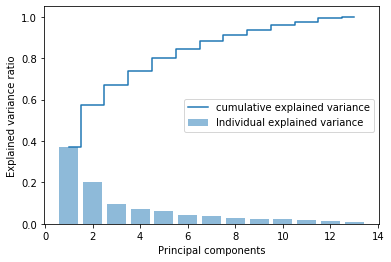

In [213]:


plt.bar(range(1,14), var_explained, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,14),cum_var_explained, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [214]:
# Keep the first 7 principal components 
# P_reduce is 13 x 7 matrix
P_reduce = np.array(eigvectors_sort[0:7]).transpose()
# The projected data in 2D will be n x 7 matrix
Proj_data_2D = np.dot(X_std,P_reduce)

In [215]:
X_std.shape, P_reduce.shape, Proj_data_2D.shape

((178, 13), (13, 7), (178, 7))

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
result = []
names = []
models=[]
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Decision Tree',DecisionTreeClassifier(max_depth=10,random_state=0,max_features=1,min_samples_leaf=15)))
models.append(('KNN',KNeighborsClassifier(n_neighbors=15)))
models.append(('Bagging',BaggingClassifier(n_estimators=50)))
models.append(('AdaBoost',AdaBoostClassifier(n_estimators=50)))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest',RandomForestClassifier(random_state=30, max_depth=1)))
models.append(('GradientBoosting',GradientBoostingClassifier(n_estimators=100)
))

for name, model in models:
    kfold = model_selection.KFold(shuffle=True, n_splits=10, random_state=0)
    cv_results = model_selection.cross_val_score(model, Proj_data_2D, y_target, cv=kfold, scoring='f1_weighted')
    result.append(cv_results)
    names.append(name)
    print('%s: \n Bias Error : (%f) Variance Error : (%f)' %(name, 1-np.mean(cv_results), np.var(cv_results,ddof = 1)))
    accuracy= cv_results.mean()
    print('Accuracy:',accuracy,'\n')

Logistic Regression: 
 Bias Error : (0.010967) Variance Error : (0.000535)
Accuracy: 0.9890331890331889 

Decision Tree: 
 Bias Error : (0.426854) Variance Error : (0.006324)
Accuracy: 0.5731460124842477 

KNN: 
 Bias Error : (0.006318) Variance Error : (0.000399)
Accuracy: 0.9936819172113289 

Bagging: 
 Bias Error : (0.038677) Variance Error : (0.002084)
Accuracy: 0.9613227513227514 

AdaBoost: 
 Bias Error : (0.096579) Variance Error : (0.007054)
Accuracy: 0.9034209436170221 

Naive Bayes: 
 Bias Error : (0.022985) Variance Error : (0.001571)
Accuracy: 0.9770152505446623 

RandomForest: 
 Bias Error : (0.073810) Variance Error : (0.004365)
Accuracy: 0.9261903398745505 

GradientBoosting: 
 Bias Error : (0.028529) Variance Error : (0.001596)
Accuracy: 0.9714709183336634 



#### Observation : KNN performs well as there is a good bias error and variance error trade-off compared to other models.

In [217]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Proj_data_2D,y_target,test_size=0.3,random_state=10)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((124, 7), (54, 7), (124,), (54,))

## K Nearest Neighbor

In [218]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred_knn= knn.predict(x_test)
print("Accuracy on training set: {:.3f}".format(knn.score(x_train, y_train)))

print("accuracy score for predicted y in KNN:",accuracy_score(y_test, y_pred_knn))

Accuracy on training set: 0.992
accuracy score for predicted y in KNN: 0.9814814814814815


In [219]:
from sklearn.metrics import confusion_matrix,classification_report
cm_knn= confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[16  0  0]
 [ 0 24  0]
 [ 0  1 13]]


In [220]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.96      1.00      0.98        24
           2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



## Important features from the model

Model Coefficients
 Alcohol : 0.410485
 Malic_Acid : 0.376485
 Ash : 0.009008
 Alcalinity_of_Ash : 0.009014
 Magnesium : -0.002263
 Total_phenols : 0.015779
 Falvanoids : -0.003397


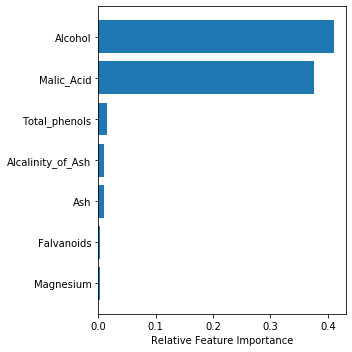

In [221]:
from sklearn.inspection import permutation_importance

results = permutation_importance(knn, Proj_data_2D, y_target, scoring='f1_weighted')
# get importance
importance = results.importances_mean
print('Model Coefficients')
for i,v in zip(km_df.columns,importance):
    print(' %s : %f' % (i,v))
feature_importance = abs(importance)
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize =(5,5))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(km_df.columns)[sorted_idx])
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

#### Observation : From the Model coefficients, it is evident that the most important features are Alcohol and Malic_acid